<a href="https://colab.research.google.com/github/Fanfave1/Nigeria-covid-19-dataanalysis-project/blob/main/COVID_19_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import libraries

In [7]:
import pandas as pd

In [9]:
#load datasets

In [10]:
covid_nig_data = pd.read_csv('/covidnig.csv')

In [11]:
budget_data = pd.read_csv('/Budget data.csv')

In [12]:
covid_external_data = pd.read_csv('/covid_external.csv')

In [14]:
real_gdp_data = pd.read_csv('/RealGDP.csv')

In [15]:
#clean datasets

In [16]:
covid_nig_data.columns = ['States Affected', 'No. of Cases(Lab Confirmed)', 'No. of Cases(On Admission)', 'No. Discharged', 'No. of Deaths']

In [17]:
covid_nig_data = covid_nig_data.fillna(0)

In [18]:
budget_data.columns = ['States', 'Initial_budget(Bn)', 'Revised_budget(Bn)']

In [20]:
budget_data = budget_data.fillna(0)

In [21]:
covid_external_data.columns = ['States', 'Region', 'Population', 'OverallCCVI  Index', 'Age', 'Epidemiological', 'Fragility', 'Health System', 'Population Density ', 'Socio-economic', 'Transport Availability', 'Acute IHR']

In [23]:
covid_external_data = covid_external_data.fillna(0)

In [24]:
real_gdp_data.columns = ['Year', 'Q1', 'Q2', 'Q3', 'Q4']

In [25]:
real_gdp_data = real_gdp_data.fillna(0)

In [26]:
print(covid_nig_data.head())

  States Affected No. of Cases(Lab Confirmed) No. of Cases(On Admission)  \
0           Lagos                      26,708                      2,435   
1             FCT                       9,627                      2,840   
2          Kaduna                       4,504                        579   
3         Plateau                       4,262                        280   
4             Oyo                       3,788                        368   

  No. Discharged  No. of Deaths  
0         24,037            236  
1          6,694             93  
2          3,877             48  
3          3,948             34  
4          3,374             46  


In [27]:
#Calculate total cases, deaths, and recoveries across all states

In [28]:
total_cases = covid_nig_data['No. of Cases(Lab Confirmed)'].sum()

In [29]:
total_deaths = covid_nig_data['No. of Deaths'].sum()

In [30]:
total_recoveries = covid_nig_data['No. Discharged'].sum()

In [31]:
#Add new columns for case percentages by state

In [32]:
print(covid_nig_data['No. of Cases(Lab Confirmed)'].unique())

['26,708' '9,627' '4,504' '4,262' '3,788' '3,279' '2,768' '2,382' '2,032'
 '1,843' '1,793' '1,405' '1,376' '1,296' '1,164' '1,091' '980' '979 '
 '897' '778' '734' '600' '515' '497' '405' '395' '386' '381' '355' '299'
 '228' '203' '164' '143' '93' '79' '5']


In [33]:

covid_nig_data['No. of Cases(Lab Confirmed)'] = pd.to_numeric(
    covid_nig_data['No. of Cases(Lab Confirmed)'], errors='coerce'
)

In [35]:
total_cases = covid_nig_data['No. of Cases(Lab Confirmed)'].sum()

In [36]:

covid_nig_data['Cases Percentage'] = (covid_nig_data['No. of Cases(Lab Confirmed)'] / total_cases) * 100

In [37]:
covid_nig_data['Deaths Percentage'] = (covid_nig_data['No. of Deaths'] / total_deaths) * 100

In [38]:
print(covid_nig_data['No. Discharged'].unique())

['24,037' '6,694' '3,877' '3,948' '3,374' '2,987' '2,603' '2,175' '1,778'
 '1,737' '1,690' '1,167' '1,321' '1,094' '950' '1,037' '945' '937' '775'
 '705' '661' '325' '460' '421' '375' '342' '318' '300' '238' '274' '171'
 '177' '123' '130' '81' '73' '3']


In [39]:
covid_nig_data['No. Discharged'] = covid_nig_data['No. Discharged'].str.replace(',', '').astype(float)

In [40]:
covid_nig_data['No. Discharged'] = pd.to_numeric(covid_nig_data['No. Discharged'], errors='coerce')

In [41]:
total_recoveries = covid_nig_data['No. Discharged'].sum()
print(total_recoveries)

68303.0


In [44]:
covid_nig_data['No. Discharged'] = covid_nig_data['No. Discharged'].fillna(0)
total_recoveries = covid_nig_data['No. Discharged'].sum()

In [43]:
covid_nig_data['Recoveries Percentage'] = (covid_nig_data['No. Discharged'] / total_recoveries) * 100

In [ ]:
# Display the summary

In [ ]:
print("Total Confirmed Cases:", total_cases)

Total Confirmed Cases: 9116.0


In [ ]:
print("Total Deaths:", total_deaths)

Total Deaths: 1221


In [ ]:
print("Total Recoveries:", total_recoveries)

Total Recoveries: 68303.0


In [ ]:
covid_nig_data[['States Affected', 'No. of Cases(Lab Confirmed)', 'No. of Deaths', 'No. Discharged',
                'Cases Percentage', 'Deaths Percentage', 'Recoveries Percentage']]

,States Affected,No. of Cases(Lab Confirmed),No. of Deaths,No. Discharged,Cases Percentage,Deaths Percentage,Recoveries Percentage
0,Lagos,NaN,236,24037.0,NaN,19.328419,35.191719
1,FCT,NaN,93,6694.0,NaN,7.616708,9.800448
2,Kaduna,NaN,48,3877.0,NaN,3.931204,5.676178
3,Plateau,NaN,34,3948.0,NaN,2.784603,5.780127
4,Oyo,NaN,46,3374.0,NaN,3.767404,4.939754
5,Rivers,NaN,60,2987.0,NaN,4.914005,4.373161
6,Edo,NaN,113,2603.0,NaN,9.254709,3.810960
7,Ogun,NaN,33,2175.0,NaN,2.702703,3.184340
8,Kano,NaN,56,1778.0,NaN,4.586405,2.603107
9,Delta,NaN,49,1737.0,NaN,4.013104,2.543080


In [ ]:
# Top 5 states with highest cases
top_5_cases = covid_nig_data.nlargest(5, 'No. of Cases(Lab Confirmed)')

# Top 5 states with lowest cases
bottom_5_cases = covid_nig_data.nsmallest(5, 'No. of Cases(Lab Confirmed)')

print("Top 5 States with Most Cases:")
print(top_5_cases[['States Affected', 'No. of Cases(Lab Confirmed)']])

print("Top 5 States with Least Cases:")
print(bottom_5_cases[['States Affected', 'No. of Cases(Lab Confirmed)']])

Top 5 States with Most Cases:
   States Affected  No. of Cases(Lab Confirmed)
16            Abia                        980.0
17            Osun                        979.0
18          Bauchi                        897.0
19           Borno                        778.0
20             Imo                        734.0
Top 5 States with Least Cases:
   States Affected  No. of Cases(Lab Confirmed)
36            Kogi                          5.0
35        Zamfara                          79.0
34     Cross River                         93.0
33           Kebbi                        143.0
32            Yobe                        164.0


In [ ]:
#visualization

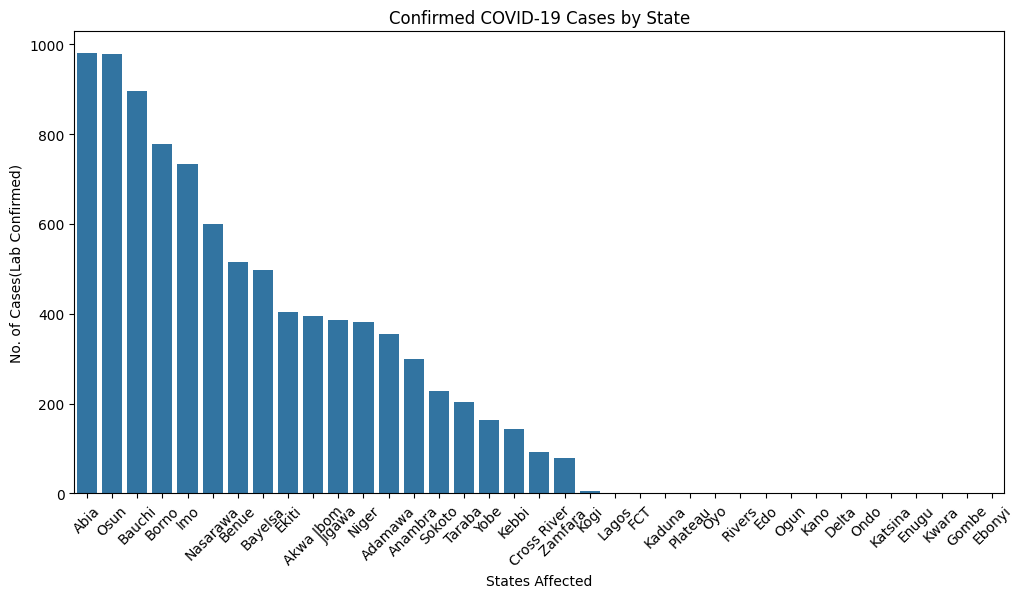

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Confirmed cases by state
plt.figure(figsize=(12, 6))
sns.barplot(x='States Affected', y='No. of Cases(Lab Confirmed)', data=covid_nig_data.sort_values(by='No. of Cases(Lab Confirmed)', ascending=False))
plt.title('Confirmed COVID-19 Cases by State')
plt.xticks(rotation=45)
plt.show()